# Assignment 2  Made by Yige Yang

## yige_yang@berkeley.edu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

### Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data

In [14]:
def get_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [5]:
def get_data_1(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [6]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT']

In [9]:
df_base = pd.concat(get_data(token) for token in tokens)

In [10]:
df_flow = get_data_1("FLOW")

In [12]:
df_total = pd.concat([df_base,df_flow])

In [13]:
df_total

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
5,2021-11-22 05:00:00,4168.350,4186.490,4151.320,4158.060,3897.508536,1.625787e+07,ETH
6,2021-11-22 06:00:00,4157.700,4187.420,4128.040,4187.420,5802.716761,2.415259e+07,ETH
7,2021-11-22 07:00:00,4187.670,4189.520,4163.700,4182.490,3299.589361,1.379359e+07,ETH
8,2021-11-22 08:00:00,4182.540,4220.480,4180.130,4190.730,3316.448902,1.394386e+07,ETH
9,2021-11-22 09:00:00,4191.400,4214.850,4188.640,4200.910,2318.602012,9.739035e+06,ETH


### Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [18]:
df_total.groupby(['token'])['volumeUSD'].sum().sort_values(ascending=False)

token
ETH     1.987952e+10
SOL     6.522383e+09
AVAX    3.304097e+09
USDT    1.906429e+09
FLOW    8.275408e+07
Name: volumeUSD, dtype: float64

### Add a column that calculates the close price ratio between ETH and SOL for each hour (i.e. close price of ETH / close price of SOL for each period)

In [22]:
ETH = df_total[df_total['token']=='ETH'].set_index("ts")
SOL = df_total[df_total['token']=='SOL'].set_index("ts")

In [24]:
price_ratio = ETH['close']/SOL['close']

In [25]:
price_ratio

ts
2021-11-22 00:00:00    18.471694
2021-11-22 01:00:00    18.736150
2021-11-22 02:00:00    18.577985
2021-11-22 03:00:00    18.794937
2021-11-22 04:00:00    18.891059
2021-11-22 05:00:00    19.132295
2021-11-22 06:00:00    18.819865
2021-11-22 07:00:00    19.053496
2021-11-22 08:00:00    19.367008
2021-11-22 09:00:00    19.393619
2021-11-22 10:00:00    19.303395
2021-11-22 11:00:00    18.846309
2021-11-22 12:00:00    19.057801
2021-11-22 13:00:00    19.130970
2021-11-22 14:00:00    19.188800
2021-11-22 15:00:00    19.213760
2021-11-22 16:00:00    19.036432
2021-11-22 17:00:00    18.863852
2021-11-22 18:00:00    18.847068
2021-11-22 19:00:00    18.975643
2021-11-22 20:00:00    19.097422
2021-11-22 21:00:00    18.857755
2021-11-22 22:00:00    18.744495
2021-11-22 23:00:00    18.797252
2021-11-23 00:00:00    18.949895
2021-11-23 01:00:00    18.948690
2021-11-23 02:00:00    18.814238
2021-11-23 03:00:00    18.879754
2021-11-23 04:00:00    18.910531
2021-11-23 05:00:00    18.944115
       

### Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

In [27]:
df_total.rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    })

,ts,open,high,low,close,volumeBase,volumeTerm,token
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
5,2021-11-22 05:00:00,4168.350,4186.490,4151.320,4158.060,3897.508536,1.625787e+07,ETH
6,2021-11-22 06:00:00,4157.700,4187.420,4128.040,4187.420,5802.716761,2.415259e+07,ETH
7,2021-11-22 07:00:00,4187.670,4189.520,4163.700,4182.490,3299.589361,1.379359e+07,ETH
8,2021-11-22 08:00:00,4182.540,4220.480,4180.130,4190.730,3316.448902,1.394386e+07,ETH
9,2021-11-22 09:00:00,4191.400,4214.850,4188.640,4200.910,2318.602012,9.739035e+06,ETH


### Create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [30]:
df_new = df_total.set_index("ts")
df_new = pd.pivot_table(df_new,index=['ts'],columns=['token'],values=['close'])
df_new

close                                  
token                  AVAX      ETH    FLOW      SOL    USDT
ts                                                           
2021-11-22 00:00:00  128.67  4262.99  14.150  230.785  1.0012
2021-11-22 01:00:00  134.85  4234.37  13.621  226.000  1.0013
2021-11-22 02:00:00  132.54  4217.89  13.753  227.037  1.0012
2021-11-22 03:00:00  133.38  4193.47  13.652  223.117  1.0011
2021-11-22 04:00:00  136.29  4168.35  13.581  220.652  1.0009
2021-11-22 05:00:00  132.02  4158.06  13.392  217.332  1.0008
2021-11-22 06:00:00  134.93  4187.42  13.548  222.500  1.0008
2021-11-22 07:00:00  135.29  4182.49  13.444  219.513  1.0009
2021-11-22 08:00:00  131.98  4190.73  14.596  216.385  1.0008
2021-11-22 09:00:00  134.95  4200.91  14.494  216.613  1.0008
2021-11-22 10:00:00  133.70  4192.35  14.047  217.182  1.0008
2021-11-22 11:00:00  136.84  4206.76  14.054  223.214  1.0007
2021-11-22 12:00:00  134.91  4175.85  14.174  219.115  1.0009
2021-11-22 13:00:00  131.68  4180.71  14.064  218.531  1.0010
2021-11-22 14:00:00  135.20  4279.87  14.330  223.040  1.0007
2021-11-22 15:00:00  133.82  4243.82  14.283  220.874  1.0009
2021-11-22 16:00:00  139.38  4238.69  14.242  222.662  1.0007
2021-11-22 17:00:00  142.21  4234.35  13.993  224.469  1.0008
2021-11-22 18:00:00  144.18  4212.15  13.853  223.491  1.0007
2021-11-22 19:00:00  143.57  4140.77  13.852  218.215  1.0007
2021-11-22 20:00:00  136.19  4067.56  13.529  212.990  1.0007
2021-11-22 21:00:00  139.33  4064.28  13.505  215.523  1.0009
2021-11-22 22:00:00  139.61  4081.37  13.469  217.737  1.0007
2021-11-22 23:00:00  138.35  4117.35  13.607  219.040  1.0005
2021-11-23 00:00:00  135.29  4089.16  13.468  215.788  1.0007
2021-11-23 01:00:00  136.75  4135.76  13.487  218.261  1.0006
2021-11-23 02:00:00  134.28  4142.50  13.336  220.179  1.0006
2021-11-23 03:00:00  132.70  4161.06  13.157  220.398  1.0005
2021-11-23 04:00:00  134.16  4180.57  13.143  221.071  1.0003
2021-11-23 05:00:00  133.69  4170.49  13.280  220.147  1.0005
...                     ...      ...     ...      ...     ...
2021-12-12 07:00:00   85.43  4058.18   9.162  169.840  1.0006
2021-12-12 08:00:00   85.49  4059.30   9.236  170.250  1.0006
2021-12-12 09:00:00   84.29  4013.20   9.240  168.780  1.0005
2021-12-12 10:00:00   83.25  4006.98   9.108  168.230  1.0004
2021-12-12 11:00:00   84.10  4015.32   9.043  168.340  1.0005
2021-12-12 12:00:00   84.54  4040.35   9.088  169.180  1.0006
2021-12-12 13:00:00   84.62  4038.30   9.113  169.710  1.0005
2021-12-12 14:00:00   85.30  4047.66   9.136  171.370  1.0006
2021-12-12 15:00:00   85.89  4050.31   9.155  170.920  1.0005
2021-12-12 16:00:00   85.01  4027.73   9.134  170.520  1.0007
2021-12-12 17:00:00   85.56  4047.22   9.185  171.780  1.0005
2021-12-12 18:00:00   86.77  4088.28   9.263  175.470  1.0005
2021-12-12 19:00:00   88.06  4151.84   9.225  175.420  1.0006
2021-12-12 20:00:00   87.41  4141.99   9.269  174.570  1.0005
2021-12-12 21:00:00   88.30  4149.73   9.332  174.540  1.0006
2021-12-12 22:00:00   87.57  4124.01   9.321  173.470  1.0006
2021-12-12 23:00:00   87.70  4156.67   9.213  174.220  1.0006
2021-12-13 00:00:00   88.08  4132.92   9.185  172.930  1.0006
2021-12-13 01:00:00   89.48  4069.44   9.100  170.720  1.0006
2021-12-13 02:00:00   86.69  3970.92   9.043  168.030  1.0004
2021-12-13 03:00:00   87.55  3984.29   8.968  167.770  1.0006
2021-12-13 04:00:00   88.47  3998.87   9.030  167.460  1.0006
2021-12-13 05:00:00   88.00  4020.10   9.022  167.490  1.0006
2021-12-13 06:00:00   87.91  4041.43   9.080  167.160  1.0006
2021-12-13 07:00:00   84.98  3992.01   8.996  164.930  1.0006
2021-12-13 08:00:00   84.59  3988.89   8.942  164.190  1.0004
2021-12-13 09:00:00   85.68  4022.19   9.012  165.980  1.0004
2021-12-13 10:00:00   84.97  4001.58   9.012  166.030  1.0005
2021-12-13 11:00:00   84.33  3997.43   9.018  166.540  1.0006
2021-12-13 12:00:00   84.25  4012.09   9.091  167.700  1.0005

[517 rows x 5 columns]

### Calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [33]:
close_shift = df_total.groupby(['token'])['close'].shift(1)

In [41]:
log_close = np.log(df_total['close']/df_total.groupby(['token'])['close'].shift(1))

In [42]:
df_total['log_close'] = log_close

In [43]:
df_total

,ts,open,high,low,close,volume,volumeUSD,token,log_close_shift,log_close
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,NaN,NaN
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,-0.006736,-0.006736
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,-0.003900,-0.003900
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,-0.005806,-0.005806
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,-0.006008,-0.006008
5,2021-11-22 05:00:00,4168.350,4186.490,4151.320,4158.060,3897.508536,1.625787e+07,ETH,-0.002472,-0.002472
6,2021-11-22 06:00:00,4157.700,4187.420,4128.040,4187.420,5802.716761,2.415259e+07,ETH,0.007036,0.007036
7,2021-11-22 07:00:00,4187.670,4189.520,4163.700,4182.490,3299.589361,1.379359e+07,ETH,-0.001178,-0.001178
8,2021-11-22 08:00:00,4182.540,4220.480,4180.130,4190.730,3316.448902,1.394386e+07,ETH,0.001968,0.001968
9,2021-11-22 09:00:00,4191.400,4214.850,4188.640,4200.910,2318.602012,9.739035e+06,ETH,0.002426,0.002426


### Calculate the correlation of the tokens using the table above

In [44]:
df_final = df_total.set_index("ts")
df_final = pd.pivot_table(df_final,index=['ts'],columns=['token'],values=['log_close'])
df_final

log_close                                      
token                    AVAX       ETH      FLOW       SOL    USDT
ts                                                                 
2021-11-22 01:00:00  0.046912 -0.006736 -0.038102 -0.020952  0.0001
2021-11-22 02:00:00 -0.017279 -0.003900  0.009644  0.004578 -0.0001
2021-11-22 03:00:00  0.006318 -0.005806 -0.007371 -0.017417 -0.0001
2021-11-22 04:00:00  0.021583 -0.006008 -0.005214 -0.011109 -0.0002
2021-11-22 05:00:00 -0.031832 -0.002472 -0.014014 -0.015161 -0.0001
2021-11-22 06:00:00  0.021803  0.007036  0.011581  0.023501  0.0000
2021-11-22 07:00:00  0.002664 -0.001178 -0.007706 -0.013516  0.0001
2021-11-22 08:00:00 -0.024770  0.001968  0.082215 -0.014352 -0.0001
2021-11-22 09:00:00  0.022254  0.002426 -0.007013  0.001053  0.0000
2021-11-22 10:00:00 -0.009306 -0.002040 -0.031326  0.002623  0.0000
2021-11-22 11:00:00  0.023214  0.003431  0.000498  0.027395 -0.0001
2021-11-22 12:00:00 -0.014204 -0.007375  0.008502 -0.018534  0.0002
2021-11-22 13:00:00 -0.024233  0.001163 -0.007791 -0.002669  0.0001
2021-11-22 14:00:00  0.026380  0.023442  0.018737  0.020423 -0.0003
2021-11-22 15:00:00 -0.010260 -0.008459 -0.003285 -0.009759  0.0002
2021-11-22 16:00:00  0.040708 -0.001210 -0.002875  0.008063 -0.0002
2021-11-22 17:00:00  0.020101 -0.001024 -0.017638  0.008083  0.0001
2021-11-22 18:00:00  0.013758 -0.005257 -0.010055 -0.004366 -0.0001
2021-11-22 19:00:00 -0.004240 -0.017091 -0.000072 -0.023890  0.0000
2021-11-22 20:00:00 -0.052772 -0.017838 -0.023594 -0.024236  0.0000
2021-11-22 21:00:00  0.022794 -0.000807 -0.001776  0.011822  0.0002
2021-11-22 22:00:00  0.002008  0.004196 -0.002669  0.010220 -0.0002
2021-11-22 23:00:00 -0.009066  0.008777  0.010194  0.005966 -0.0002
2021-11-23 00:00:00 -0.022366 -0.006870 -0.010268 -0.014958  0.0002
2021-11-23 01:00:00  0.010734  0.011332  0.001410  0.011395 -0.0001
2021-11-23 02:00:00 -0.018227  0.001628 -0.011259  0.008749  0.0000
2021-11-23 03:00:00 -0.011836  0.004470 -0.013513  0.000994 -0.0001
2021-11-23 04:00:00  0.010942  0.004678 -0.001065  0.003049 -0.0002
2021-11-23 05:00:00 -0.003509 -0.002414  0.010370 -0.004188  0.0002
2021-11-23 06:00:00  0.001794 -0.003230 -0.008545 -0.009241 -0.0003
...                       ...       ...       ...       ...     ...
2021-12-12 07:00:00  0.010709  0.004465 -0.016239  0.007802  0.0000
2021-12-12 08:00:00  0.000702  0.000276  0.008044  0.002411  0.0000
2021-12-12 09:00:00 -0.014136 -0.011422  0.000433 -0.008672 -0.0001
2021-12-12 10:00:00 -0.012415 -0.001551 -0.014389 -0.003264 -0.0001
2021-12-12 11:00:00  0.010158  0.002079 -0.007162  0.000654  0.0001
2021-12-12 12:00:00  0.005218  0.006214  0.004964  0.004977  0.0001
2021-12-12 13:00:00  0.000946 -0.000508  0.002747  0.003128 -0.0001
2021-12-12 14:00:00  0.008004  0.002315  0.002521  0.009734  0.0001
2021-12-12 15:00:00  0.006893  0.000654  0.002078 -0.002629 -0.0001
2021-12-12 16:00:00 -0.010299 -0.005590 -0.002296 -0.002343  0.0002
2021-12-12 17:00:00  0.006449  0.004827  0.005568  0.007362 -0.0002
2021-12-12 18:00:00  0.014043  0.010094  0.008456  0.021253  0.0000
2021-12-12 19:00:00  0.014757  0.015427 -0.004111 -0.000285  0.0001
2021-12-12 20:00:00 -0.007409 -0.002375  0.004758 -0.004857 -0.0001
2021-12-12 21:00:00  0.010130  0.001867  0.006774 -0.000172  0.0001
2021-12-12 22:00:00 -0.008302 -0.006217 -0.001179 -0.006149  0.0000
2021-12-12 23:00:00  0.001483  0.007888 -0.011654  0.004314  0.0000
2021-12-13 00:00:00  0.004324 -0.005730 -0.003044 -0.007432  0.0000
2021-12-13 01:00:00  0.015770 -0.015479 -0.009297 -0.012862  0.0000
2021-12-13 02:00:00 -0.031677 -0.024508 -0.006283 -0.015882 -0.0002
2021-12-13 03:00:00  0.009872  0.003361 -0.008328 -0.001549  0.0002
2021-12-13 04:00:00  0.010453  0.003653  0.006890 -0.001849  0.0000
2021-12-13 05:00:00 -0.005327  0.005295 -0.000886  0.000179  0.0000
2021-12-13 06:00:00 -0.001023  0.005292  0.006408 -0.001972  0.0000
2021-12-13 07:00:00 -0.033898 -0.012304 -0.009294 -0.013430  0.0000
2021-12-

In [45]:
df_final.corr()

log_close                                        
token                AVAX       ETH      FLOW       SOL      USDT
          token                                                  
log_close AVAX   1.000000  0.638418  0.382073  0.618788 -0.015584
          ETH    0.638418  1.000000  0.557056  0.734282 -0.116884
          FLOW   0.382073  0.557056  1.000000  0.439780 -0.197541
          SOL    0.618788  0.734282  0.439780  1.000000  0.111900
          USDT  -0.015584 -0.116884 -0.197541  0.111900  1.000000

 ### Visualize the correlation in a matplpotlib plot

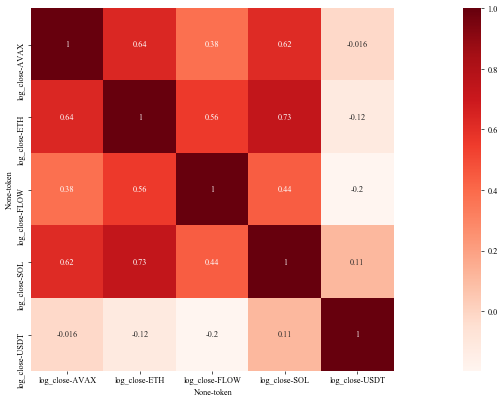

In [47]:
import seaborn as sns
plt.figure(figsize=(30,8),dpi=60,facecolor='w')
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
fonten = {'family':'Times New Roman'}
sns.heatmap(df_final.corr(), annot=True, vmax=1, square=True, cmap="Reds")